# Netflix Dataset EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the dataset

df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
type(df)

pandas.core.frame.DataFrame

### Data Cleaning

In [5]:

df.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

In [6]:
df['director']=df['director'].fillna('unknown')
df['cast']=df['cast'].fillna('unknown')
df['country']=df['country'].fillna('unknown')
df['date_added']=df['date_added'].fillna('unknown')
df['rating']=df['rating'].fillna('Not Rated')
df=df.dropna(subset=['duration'])

In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Splitting Dataset in Movies and TV Shows

In [9]:
df_movies=df[df['type']=='Movie']
df_shows=df[df['type']=='TV Show']

In [10]:
df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [76]:
df_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [79]:
df['type'].value_counts()

type
Movie      6128
TV Show    2676
Name: count, dtype: int64

In [80]:
df_movies['rating'].value_counts()


rating
TV-MA        2062
TV-14        1427
R             797
TV-PG         540
PG-13         490
PG            287
TV-Y7         139
TV-Y          131
TV-G          126
NR             75
G              41
TV-Y7-FV        5
NC-17           3
UR              3
Not Rated       2
Name: count, dtype: int64

In [81]:
df_shows['rating'].value_counts()

rating
TV-MA        1145
TV-14         733
TV-PG         323
TV-Y7         195
TV-Y          176
TV-G           94
NR              5
R               2
Not Rated       2
TV-Y7-FV        1
Name: count, dtype: int64

In [11]:
df_movies['duration_min'] = df_movies['duration'].str.replace(' min', '').astype(int)



C:\Users\sharm\AppData\Local\Temp\ipykernel_12760\1913582830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration_min'] = df_movies['duration'].str.replace(' min', '').astype(int)


In [12]:
df_shows['duration_season']=df_shows['duration'].str.replace(' Season', '')


C:\Users\sharm\AppData\Local\Temp\ipykernel_12760\1291680825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shows['duration_season']=df_shows['duration'].str.replace(' Season', '')


In [13]:
df_shows['duration_season']=df_shows['duration_season'].str.replace('s', '').astype(int)

C:\Users\sharm\AppData\Local\Temp\ipykernel_12760\1743482850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shows['duration_season']=df_shows['duration_season'].str.replace('s', '').astype(int)


## Gathering Insights

In [ ]:
meantime=df_movies['duration_min'].mean()

df_shows['duration_season'].value_counts()

99.57718668407311 0    1
Name: duration_season, dtype: int64


duration_season
1     1793
2      425
3      199
4       95
5       65
6       33
7       23
8       17
9        9
10       7
13       3
12       2
15       2
11       2
17       1
Name: count, dtype: int64

In [119]:
df_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_season
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,unknown,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2
8796,s8797,TV Show,Yunus Emre,unknown,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2
8797,s8798,TV Show,Zak Storm,unknown,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,3
8800,s8801,TV Show,Zindagi Gulzar Hai,unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",1


<Axes: xlabel='type', ylabel='count'>

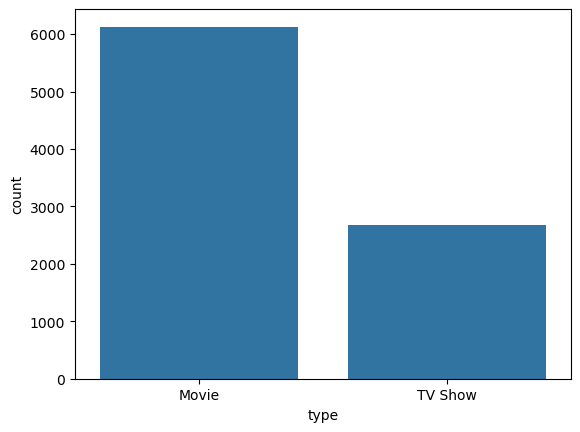

In [131]:
sns.countplot(x='type', data=df)


Text(0, 0.5, 'Count')

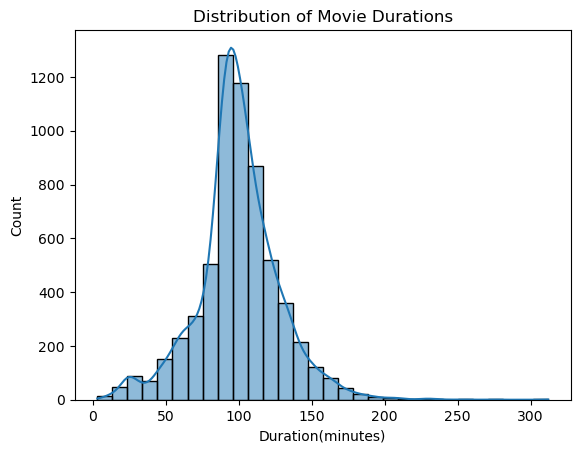

In [114]:
sns.histplot(df_movies['duration_min'],bins=30,kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration(minutes)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

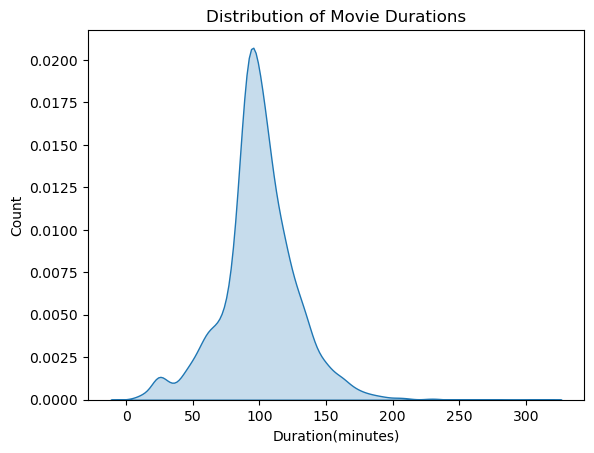

In [129]:
sns.kdeplot(df_movies['duration_min'],fill=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration(minutes)')
plt.ylabel('Count')

Text(0.5, 1.0, 'Duration Trend with Time')

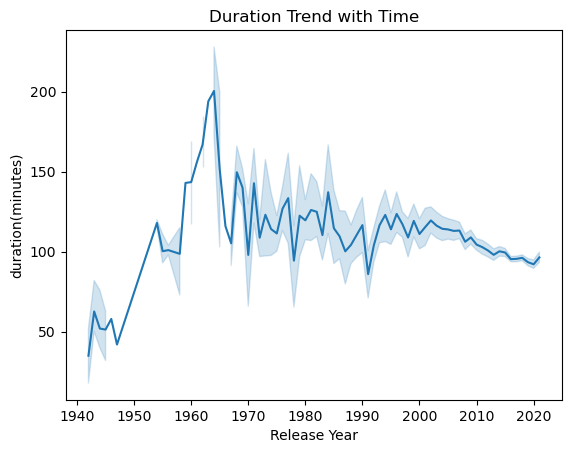

In [14]:
sns.lineplot(y=df_movies['duration_min'],x=df_movies['release_year'],data=df_movies)
plt.xlabel('Release Year')
plt.ylabel('duration(minutes)')
plt.title('Duration Trend with Time')

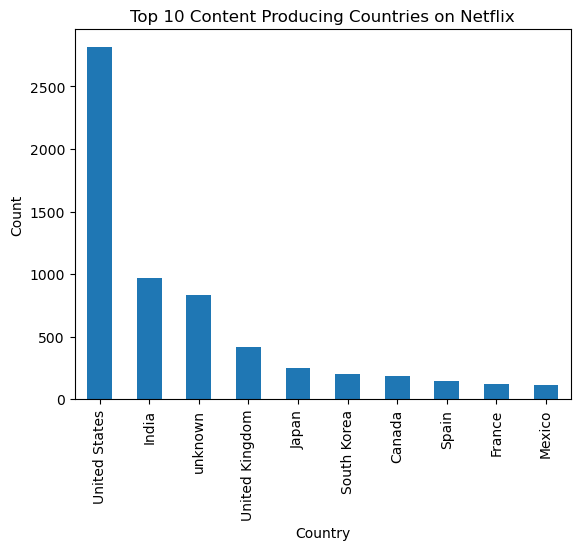

In [126]:
top_countries = df['country'].value_counts().head(10)

top_countries.plot(kind='bar')
plt.title('Top 10 Content Producing Countries on Netflix')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


Text(0.5, 1.0, 'Release Frequency Trend with time')

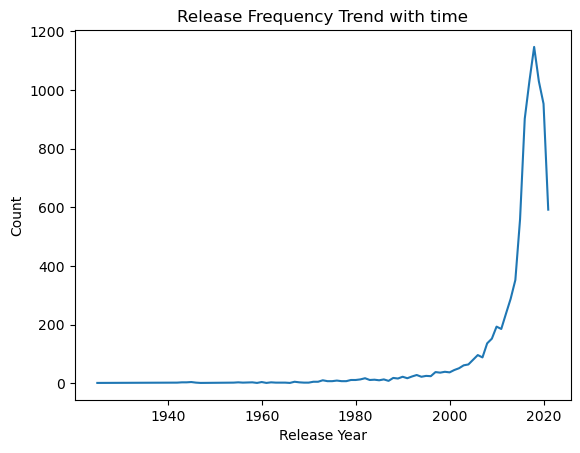

In [133]:
df['release_year'].value_counts().sort_index().plot()
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Release Frequency Trend with time')


Text(0.5, 1.0, 'Shows Release Frequency Trend with time')

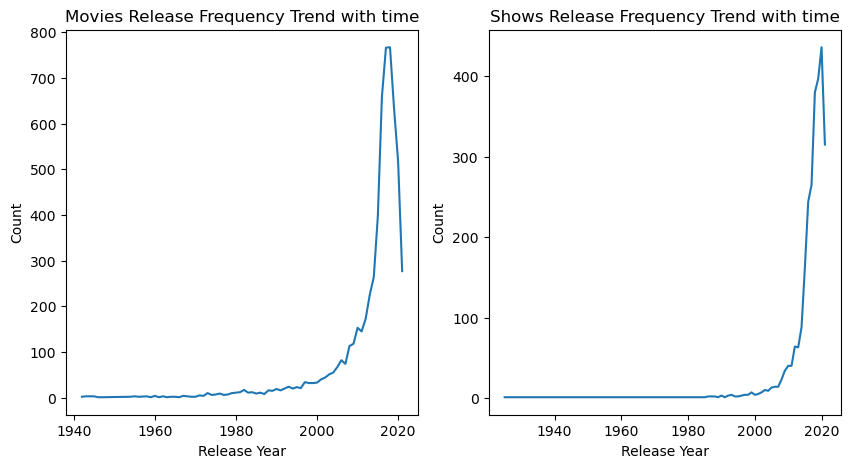

In [136]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
df_movies['release_year'].value_counts().sort_index().plot()
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Movies Release Frequency Trend with time')

plt.subplot(1,2,2)
df_shows['release_year'].value_counts().sort_index().plot()
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Shows Release Frequency Trend with time')


Text(0.5, 0, 'Release Yaer')

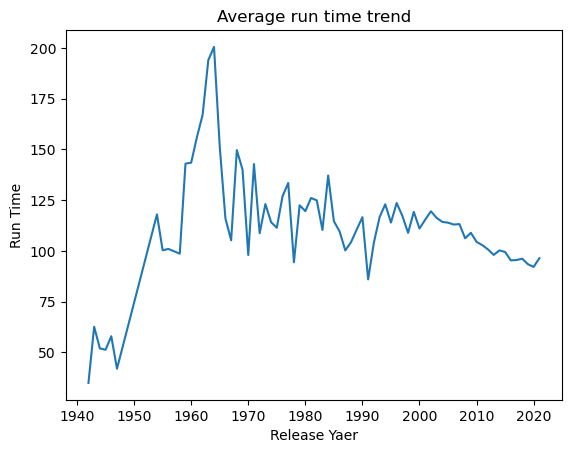

In [143]:
df_movies.groupby('release_year')['duration_min'].mean().plot()
plt.title('Average run time trend')
plt.ylabel('Run Time')
plt.xlabel('Release Yaer')
